# Lab01: Assignment
In this assignment you're required to find whether the given numbers are prime or not using sequential and parallel processing and then compare the performance of both

## 1. Sequential processing

In [11]:
import time

In [12]:
numbers = [15492781, 15492787, 15492803, 
           15492811, 15492810, 15492833, 
           15492859, 15502547, 15520301, 15527509]

In [15]:
from time import time

def is_prime(number):
    if number <= 1:
      return False
    else:
      for i in range(2, number):
        if (number % i) == 0:
          return False
     
    return True
        
   
if __name__ == "__main__":
    # your code here
    # 1. record the start time using time() function of time module     
    start = time()
    
    for number in numbers:
        # 2. print the number and 
        #    whether it is prime or not.
        #    use is_prime() function

        if is_prime(number):
          print(f"{number} is prime")
        else:
          print(f"{number} is not prime")
    
    # 3. record the performance and print out
    t_seq = time() - start
    print(f"Perfomance: {t_seq}")

15492781 is prime
15492787 is prime
15492803 is prime
15492811 is prime
15492810 is not prime
15492833 is prime
15492859 is prime
15502547 is prime
15520301 is prime
15527509 is prime
Perfomance: 12.507229804992676


## 2. Parallel processing

In [10]:
from multiprocessing import Process, Queue
from queue import Empty # exception to break from loop when the get(block=False) called on empty queue 
from time import time

In [9]:
def check_prime_worker(job_queue):
    """worker function passed as target to Process"""
    while True:
        # your code here
        # 1. get next available number from queue
        # 2. print the number and whether it
        #    is prime or not, use is_prime()
        # 3. use try/except to catch Empty exception 
        #    and quit the loop if no number remains in queue
        try: 
          number = job_queue.get(block = False)
        except Empty:
          break
        if is_prime(number):
          print(f"{number} is prime")
        else:
          print(f"{number} is not prime")

        
# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    job_queue = Queue()
    
    t_par = []
    # number of workers 
    for N in range(1, len(numbers)+1):
        # preparing the jobs to be done by workers
        for n in numbers:
            job_queue.put(n)

        # your code here

        # 1. create list of processes of N process. Choose N in range of [1:len(numbers)]

        processes = [Process(target=check_prime_worker, args=(job_queue,)) 
             for i in range(N)]

        # 2. record the start time 
        start = time()
        
        # 3. start each of the processes

        [p.start() for p in processes]

        # 4. call join on each of the processes

        [p.join() for p in processes]

        # 5. measure the performance and append to the list of records
        t_par.append(time() - start)
        
        # 6. close the processes
        [p.close() for p in processes]
        print(F"{time() - start}\n")

    print(f"{t_par}")



15492781 is prime
15492787 is prime
15492803 is prime
15492811 is prime
15492810 is not prime
15492833 is prime
15492859 is prime
15502547 is prime
15520301 is prime
15527509 is prime
12.597872972488403

15492781 is prime
15492787 is prime
15492811 is prime
15492810 is not prime
15492803 is prime
15492833 is prime
15492859 is prime
15520301 is prime
15502547 is prime
15527509 is prime
13.55779242515564

15492781 is prime
15492803 is prime
15492810 is not prime
15492787 is prime
15492833 is prime
15492859 is prime
15492811 is prime
15520301 is prime
15502547 is prime
15527509 is prime
13.422139644622803

15492787 is prime
15492810 is not prime
15492781 is prime
15492803 is prime
15492811 is prime
15520301 is prime
15492833 is prime
15492859 is prime
15502547 is prime
15527509 is prime
13.39308762550354

15492810 is not prime
15492787 is prime
15492781 is prime
15492811 is prime
15492833 is prime
15492803 is prime
15520301 is prime
15492859 is prime
15502547 is prime
15527509 is prime
13

Bonus points will be given if you show/print the name of the process that did calculation for given number (use current_process() from multiprocessing module) 

## 3. Compare the performance of Sequential processing against Parallel processing 
Draw a simple 2D graph using matplotlib:
- X axis should be number of processes from part 2, i.e., it should have values: 1, 2, 3,.., len(numbers)
- Y axis should be ratio of "time for sequential processing" (t_seq) to a "time for parallel processing" (t_par[i-1]) when i processes are used.

Explain the results in a few sentences and what factors can affect it?

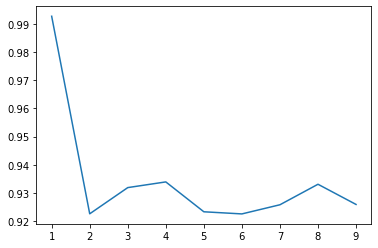

In [26]:
import matplotlib.pyplot as plt

X = list(range(1, len(numbers)))
Y = []

for i in range(1, len(numbers)):
    Y.append(t_seq/t_par[i-1])
plt.plot(X, Y)
plt.show()

In the beginning the graph increases, but after, it starts to decrease and stabelizes. The reason for this graph to be like this is that we use more processes, however, even if we include more processes, its doesnt have to mean, they all will get their own core, so it doesnt happen that the program works more efficiently with more processes. 